# Interactive Plot Assignment - Chasz Griego

The goal of this assignment is to read XPS data from a Microsoft Excel document and create an interactive plot. The data is obtained from the following link:

https://drive.google.com/uc?id=10PtumF5esk4Q1uNf9-K_dPVigWHEUShJ

This data was recorded by the Gellman research group at Carnegie Mellon University and contains XPS spectrums at multiple time points at 169 points on a crystal.

We first read the data using `urllib.request`

In [ ]:
url = 'https://drive.google.com/uc?id=10PtumF5esk4Q1uNf9-K_dPVigWHEUShJ'

import urllib.request
urllib.request.urlretrieve(url, 'XPS_Data.xlsx')

We use openpyxl to read the .xlsx file with `load_workbook`. The data is separated into multiple worksheets according to the time point. We only want spectrums at the first time point, so we read the first worksheet from our workbook by calling `worksheets[0]`. 

In [4]:
from openpyxl import load_workbook

wb = load_workbook(filename='XPS_Data.xlsx')
ws = wb.worksheets[0]

We will be visualizing counts with respect to binding energy at separate positions. Knowing the number of energies and positions (provided in the worksheet) will help us read the right number of data points. We read these values from cells D2 and D3 below.

In [5]:
nenergy = ws['D2'].value
npos = ws['D3'].value

Next we use `iter_rows` to read the column that contains the binding energy values. We have to store the values into a NumPy array. However, this will give us a 2D array with each value separated into a column vector. We use `squeeze()` to reduce it to a 1D array. `nenergy` and `npos` are now used to let us navigate the worksheet.

In [6]:
import numpy as np

BE = np.array(list(ws.iter_rows(min_row=15, max_row=15 + nenergy -1,
            min_col=1, max_col=1,
            values_only=True))).squeeze()

This is also done for the x and y values of the positions.

In [7]:
x = np.array(list(ws.iter_rows(min_row=11, max_row=11,
                               min_col=3, max_col=3 + npos - 1,
                               values_only=True))).squeeze()

y = np.array(list(ws.iter_rows(min_row=12, max_row=12,
                               min_col=3, max_col=3 + npos - 1,
                               values_only=True))).squeeze()

Finally, we read the counts. Here we do need a 2D array because the counts are recorded with respect to binding energy and position. We don't need to use `squeeze()`.

In [8]:
counts = np.array(list(ws.iter_rows(min_row=15, max_row=15 + nenergy - 1,
                                   min_col=3, max_col=3 + npos - 1,
                                   values_only=True)))

In the final cell, we create an interactive plot. On the left, the x and y values of the position are plotted, and on the right, a blank plot of counts versus binding energy is displayed. Upon running this cell, the positions are displayed and the figure commands the user to interact with the plot. If the user clicks on one of the blue data points, it will be highlighted in red, the title will describe the chosen point, and the corresponding XPS spectrum is plotted on the right figure.

This works by first plotting invisible markers in each plot. For the left plot, we plot an invisible red circle and for the right plot, we plot an invisible XPS spectrum. From there, we define the function `onpick`. This functions takes a mouse event known as a `pick_event`. This function only does something when the user clicks on the left plot. This function uses the following information: 

- The index of the data point picked
- The x position of the data point
- The y position of the data point

With this information, the title is reset to describe the point, and the red circle is redrawn, visibly, at the x and y positions. Since we also know the index, the XPS spectrum at that index is redrawn. Finally, the function redraws the entire figure, and it's updated in the output below.

<IPython.core.display.Javascript object>


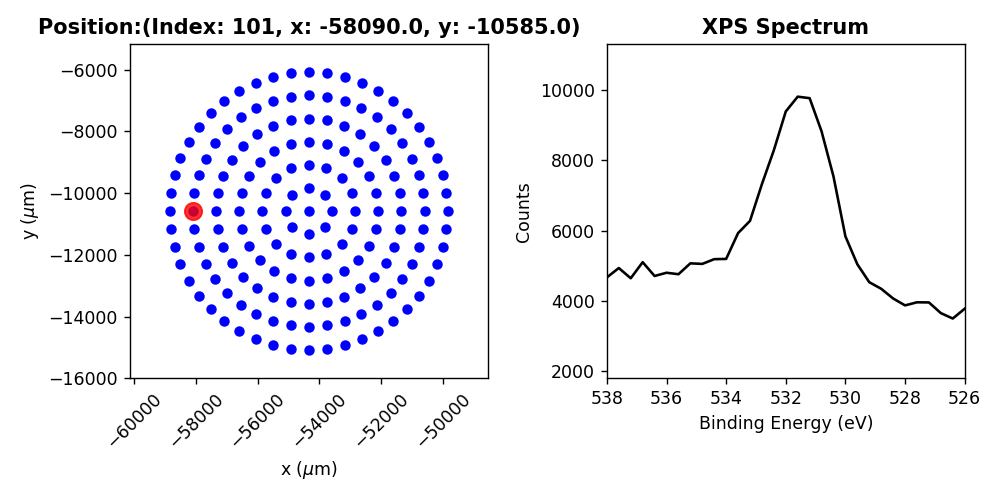

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(8,4))

#Plotting positions
ax0.plot(x, y, 'b.', picker=5, ms=10)
ax0.axis('equal');
ax0.tick_params(axis='x', rotation=45)
ax0.set_xlabel('x ($\mu$m)')
ax0.set_ylabel('y ($\mu$m)')
ax0.set_title('Click on a point',
             {'fontsize':12, 'fontweight':'bold'})

#Creating the XPS plot. The spectra aren't visible until the user interacts with the left plot.
ax1.plot(BE, counts, visible=False)
ax1.set_xlim([BE.max(), BE.min()])
ax1.set_xlabel('Binding Energy (eV)')
ax1.set_ylabel('Counts')
ax1.set_title('XPS Spectrum',
             {'fontsize':12, 'fontweight':'bold'})

#Dynamic markers created to change once the user interacts with the plots.
marker0, = ax0.plot(np.average(x), np.average(y), 'ro', visible=False, alpha=0.8, ms=10)
marker1, = ax1.plot(BE, counts[:,0], 'k', visible=False)

def onpick(event):
    ind = event.ind[0]
    
    ax0.set_title(f'''Position:(Index: {ind}, x: {x[ind]:1.1f}, y: {y[ind]:1.1f})''',
                 {'fontsize':12, 'fontweight':'bold'})

    marker0.set_visible(True)
    marker0.set_xdata(x[ind])
    marker0.set_ydata(y[ind])
    
    marker1.set_visible(True)
    marker1.set_xdata(BE)
    marker1.set_ydata(counts[:,ind])

    
    fig.canvas.draw()


fig.canvas.mpl_connect('pick_event', onpick)
plt.tight_layout()
plt.show()